<h1>MECHINE LEARNING METODE SVC 
 (Support Vector Classification) 
UNTUK MENENTUKAN NILAI PRECISSION,RECALL,F1 SCORE DAN ACCURASI <h1>

In [1]:
#instalasi modul pastikan saudah mendwonload modul libary seperti dibawah jika belum hilangkan tanda #
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install nltk
#!pip install seaborn
#!pip install matplotlib


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re

In [3]:
#langkah pertama dalam membuat confusion matrik menggunkan metode Support Vector Classification
# MEMPERSIPKAN DATA

In [4]:
#pemanggilan data
#atur sesuai path penyimpanan file di device yang digunakan data = pd.read_excel(r'alur path.xlsx')

In [5]:
data = pd.read_excel(r'C:\Users\AinXD\.kaggle\datajuduljurnal.xlsx')

In [6]:
#show data

In [7]:
data


,jaringan komputer,kriptografi,sistempakar,klasifikasi
0,Sistem Monitoring Spesifikasi dan Utilitas Hos...,Pengamanan Komputer Menggunakan Kriptografi CI...,SISTEM PAKAR DIAGNOSA HAMA PENYAKIT TANAMAN TA...,jaringan komputer
1,IMPLEMENTASI JARINGAN KOMPUTER PADA PERPUSTAKA...,ENKRIPSI DAN DEKRIPSI AUDIO FORMAT AMR DENGAN ...,SISTEM PAKAR UNTUK HAMA DAN PENYAKIT TANAMAN C...,kriptografi
2,APLIKASI AGEN BERGERAK UNTUK PENDETEKSIAN PENY...,PERANAN KRIPTOGRAFI SEBAGAI KEAMANAN SISTEM IN...,Aplikasi Sistem Pakar Untuk Mendiagnosa Penyak...,sistem pakar
3,ANALISIS KINERJA ANOMALY-BASED INTRUSION DETEC...,Penerapan Algoritma Kriptografi ElGamal untuk ...,SISTEM PAKAR MENGGUNAKAN METODE CASE BASED REA...,jaringan komputer
4,Prediksi Kemacetan pada Jaringan Komputer Meng...,E-LEARNING KRIPTOGRAFI DENGAN VIRTUAL CLASS BE...,SISTEM PAKAR PENENTUAN JENIS PLANKTONIC FORAMI...,kriptografi
5,Perancangan Sistem Jaringan Komputer Menggunak...,Kriptografi Advanced Encryption Standard (AES)...,ISTEM PAKAR PENENTUAN JENIS PENYAKIT HATI DEN...,sistem pakar
6,Sistem Pakar Fuzzy Untuk Optimasi Penggunaan B...,SISTEM KEAMANAN WEB DENGAN MENGGUNAKAN KRIPTOG...,Sistem Pakar Untuk Mengidentifikasi Hama Dan P...,jaringan komputer
7,DESAIN JARINGAN KOMPUTER PADA PERUSAHAANYANG S...,Perancangan Teknik Kriptografi Block Cipher Be...,KONSENSUS PAKAR ANATOMI INDONESIA MENGENAI MAT...,kriptografi
8,PERANAN PERANGKAT KERAS DAN PERANGKAT LUNAK DA...,"KRIPTOGRAFI ALGORITMA DES, AES/RIJNDAEL, BLOWF...",IMPLEMENTASI SISTEM PAKAR PADA PEMILIHAN VARIE...,sistem pakar
9,Analisis dan perancangan jaringan komputer Sek...,IMPLEMENTASI ALGORITMA ADVANCED ENCRYPTION STA...,PENERAPAN METODE CERTINTY FACTOR(CF) DALAM PEM...,jaringan komputer


In [8]:
#pre-processing mengubah data menjadi huruf kecil

In [9]:
data['jaringan komputer'] = data['jaringan komputer'].str.lower()
data['kriptografi'] = data['kriptografi'].str.lower()
data['sistempakar'] = data['sistempakar'].str.lower()
data['klasifikasi'] = data['klasifikasi'].str.lower()

In [10]:
data

,jaringan komputer,kriptografi,sistempakar,klasifikasi
0,sistem monitoring spesifikasi dan utilitas hos...,pengamanan komputer menggunakan kriptografi ci...,sistem pakar diagnosa hama penyakit tanaman ta...,jaringan komputer
1,implementasi jaringan komputer pada perpustaka...,enkripsi dan dekripsi audio format amr dengan ...,sistem pakar untuk hama dan penyakit tanaman c...,kriptografi
2,aplikasi agen bergerak untuk pendeteksian peny...,peranan kriptografi sebagai keamanan sistem in...,aplikasi sistem pakar untuk mendiagnosa penyak...,sistem pakar
3,analisis kinerja anomaly-based intrusion detec...,penerapan algoritma kriptografi elgamal untuk ...,sistem pakar menggunakan metode case based rea...,jaringan komputer
4,prediksi kemacetan pada jaringan komputer meng...,e-learning kriptografi dengan virtual class be...,sistem pakar penentuan jenis planktonic forami...,kriptografi
5,perancangan sistem jaringan komputer menggunak...,kriptografi advanced encryption standard (aes)...,istem pakar penentuan jenis penyakit hati den...,sistem pakar
6,sistem pakar fuzzy untuk optimasi penggunaan b...,sistem keamanan web dengan menggunakan kriptog...,sistem pakar untuk mengidentifikasi hama dan p...,jaringan komputer
7,desain jaringan komputer pada perusahaanyang s...,perancangan teknik kriptografi block cipher be...,konsensus pakar anatomi indonesia mengenai mat...,kriptografi
8,peranan perangkat keras dan perangkat lunak da...,"kriptografi algoritma des, aes/rijndael, blowf...",implementasi sistem pakar pada pemilihan varie...,sistem pakar
9,analisis dan perancangan jaringan komputer sek...,implementasi algoritma advanced encryption sta...,penerapan metode certinty factor(cf) dalam pem...,jaringan komputer


In [11]:
#menghilangkan stopword 

In [12]:
# pre procesing

def preprocess_text(text):
    if isinstance(text, str):
        
# Menghapus angka
        text = re.sub(r'\d+', '', text)  
    
# Menghapus karakter khusus
        text = re.sub(r'[^\w\s]', '', text)
    
# Mengubah teks menjadi lowercase
        text = text.lower() 
    return text
for key in data:
    data[key] = data[key].apply(preprocess_text)


In [13]:
data

,jaringan komputer,kriptografi,sistempakar,klasifikasi
0,sistem monitoring spesifikasi dan utilitas hos...,pengamanan komputer menggunakan kriptografi ci...,sistem pakar diagnosa hama penyakit tanaman ta...,jaringan komputer
1,implementasi jaringan komputer pada perpustaka...,enkripsi dan dekripsi audio format amr dengan ...,sistem pakar untuk hama dan penyakit tanaman c...,kriptografi
2,aplikasi agen bergerak untuk pendeteksian peny...,peranan kriptografi sebagai keamanan sistem in...,aplikasi sistem pakar untuk mendiagnosa penyak...,sistem pakar
3,analisis kinerja anomalybased intrusion detect...,penerapan algoritma kriptografi elgamal untuk ...,sistem pakar menggunakan metode case based rea...,jaringan komputer
4,prediksi kemacetan pada jaringan komputer meng...,elearning kriptografi dengan virtual class ber...,sistem pakar penentuan jenis planktonic forami...,kriptografi
5,perancangan sistem jaringan komputer menggunak...,kriptografi advanced encryption standard aes u...,istem pakar penentuan jenis penyakit hati den...,sistem pakar
6,sistem pakar fuzzy untuk optimasi penggunaan b...,sistem keamanan web dengan menggunakan kriptog...,sistem pakar untuk mengidentifikasi hama dan p...,jaringan komputer
7,desain jaringan komputer pada perusahaanyang s...,perancangan teknik kriptografi block cipher be...,konsensus pakar anatomi indonesia mengenai mat...,kriptografi
8,peranan perangkat keras dan perangkat lunak da...,kriptografi algoritma des aesrijndael blowfish...,implementasi sistem pakar pada pemilihan varie...,sistem pakar
9,analisis dan perancangan jaringan komputer sek...,implementasi algoritma advanced encryption sta...,penerapan metode certinty factorcf dalam pembu...,jaringan komputer


In [14]:
#LANGKAH KE 2 TRANSFORMASI DATA

In [15]:
#membuat dataframe

In [16]:
# Memisahkan fitur (X) dan label (y)
df = pd.DataFrame(data)
X = df['jaringan komputer'] +df['sistempakar']+df['kriptografi']
y = df['klasifikasi']
#PENJELASAN
#variabel 'X' dibuat dengan menggabungkan nilai dari kolom 'jaringan komputer,kriptografi dan sistem pakar', 'sistempakar', dan 'kriptografi' pada DataFrame 'df’. 
#Variabel 'y' berisi nilai dari kolom 'klasifikasi' pada DataFrame 'df'


In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)
#penjelasan
#vectorizer memanggil fungsi TF-IDF (Term Frequency-Inverse Document Frequency)
#TD-IDF sendiri sederhananya semakin banyak kata yang sering muncul maka nilainya semakin tinggi

In [18]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=40)
#penjelasan
#data tes yang digunakan 70% dari total keseluruhan data
#dan data uji digunkan 30 %

In [19]:
#LANGKAH 3 MEMBANGUN MODEL

In [20]:
#mengisnisiasikan model SVC
svm = SVC(kernel='linear')


In [21]:
#LANGKAH 4 MELATIH MODEL

In [22]:
#melatih model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
#LANGKAH 5 MENGUJI MODEL

In [24]:
y_pred = svm.predict(X_test)

In [25]:
#LANGKAH 6 EVALUASI MODEL

In [26]:
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

                   precision    recall  f1-score   support

jaringan komputer       0.33      0.67      0.44         3
      kriptografi       0.00      0.00      0.00         2
     sistem pakar       0.00      0.00      0.00         2

         accuracy                           0.29         7
        macro avg       0.11      0.22      0.15         7
     weighted avg       0.14      0.29      0.19         7



In [27]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2 0 1]
 [2 0 0]
 [2 0 0]]


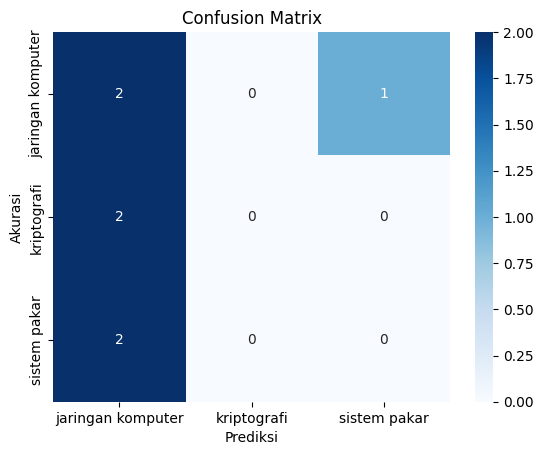

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.xlabel('Prediksi')
plt.ylabel('Akurasi')
plt.title('Confusion Matrix')
plt.show()

In [29]:
#KESIMPULAN
#Hasil confusion pengetesan model kurang berhasil melakukan klasifikasi dengan baik
#Ini ditunjukan dengan nilai mmodel preforma precison,recall dan f1-score yang rendah
#Pada kriptografi dan system pakar ,namun memiliki nilai yang cukup[ pada jaringan computer
#Serta nilai acurasi 0.29 atau 29% dari seluruh prediksi model benar
#Ini dipengaruhi beberpa hal seperti data yang kurang banyak,pelatihan model hanya sekali,dat tingkat kebagusan data